<a href="https://colab.research.google.com/github/Ellangovan-Saravanan/ellangovan/blob/main/ASN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from time import process_time
import time
from tabulate import tabulate

Data Collection and Processing

In [ ]:
# loading the dataset to pandas DataFrame
asn_traffic = pd.read_csv('/content/asn.csv')

In [ ]:
type(asn_traffic)

pandas.core.frame.DataFrame

In [ ]:
# printing the first 10 rows of the dataframe
asn_traffic.head(10)

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1
5,2006-07-01,0,3320,1
6,2006-07-01,0,3561,13
7,2006-07-01,0,4134,3
8,2006-07-01,0,5617,2
9,2006-07-01,0,6478,1


In [ ]:
# number of rows and columns
asn_traffic.shape

(20803, 4)

In [ ]:
# statistical measures
asn_traffic.describe()

,l_ipn,r_asn,f
count,20803.000000,20803.000000,20803.000000
mean,4.228236,12138.320338,93.914243
std,3.278183,9766.324252,5764.995269
min,0.000000,3.000000,1.000000
25%,1.000000,4323.000000,1.000000
50%,4.000000,8764.000000,2.000000
75%,7.000000,17676.000000,8.000000
max,9.000000,40092.000000,784234.000000


In [ ]:
# number of missing values in each column
asn_traffic.isnull().sum()

date     0
l_ipn    0
r_asn    0
f        0
dtype: int64

In [ ]:
# printing the first 10 rows of the dataframe
asn_traffic.head(10)

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1
5,2006-07-01,0,3320,1
6,2006-07-01,0,3561,13
7,2006-07-01,0,4134,3
8,2006-07-01,0,5617,2
9,2006-07-01,0,6478,1


In [ ]:
# l_ipn column values
asn_traffic['l_ipn'].value_counts()

0    3980
9    2737
2    2416
7    2233
8    2230
1    2159
4    1308
6    1305
5    1249
3    1186
Name: l_ipn, dtype: int64

In [ ]:
# date column values
asn_traffic['date'].value_counts()

2006-07-26    372
2006-07-25    358
2006-07-27    352
2006-07-28    345
2006-07-24    333
             ... 
2006-07-02    145
2006-09-04    143
2006-07-09    142
2006-09-10    126
2006-09-03    108
Name: date, Length: 92, dtype: int64

In [ ]:
# r_asn column values
asn_traffic['r_asn'].value_counts()

3561     483
4134     412
7132     367
2152     344
15169    327
        ... 
11339      1
11565      1
13930      1
14566      1
33176      1
Name: r_asn, Length: 2005, dtype: int64

In [ ]:
# f column values
asn_traffic['f'].value_counts()

1       7161
2       3994
3       1327
4       1244
6        655
        ... 
1418       1
673        1
979        1
3039       1
594        1
Name: f, Length: 707, dtype: int64

Data Visualization

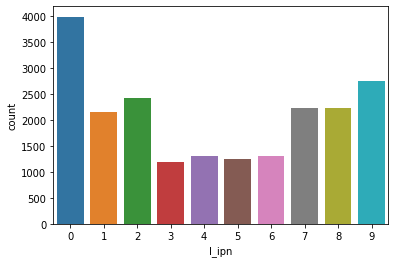

In [ ]:
sns.countplot(x='l_ipn', data=asn_traffic)

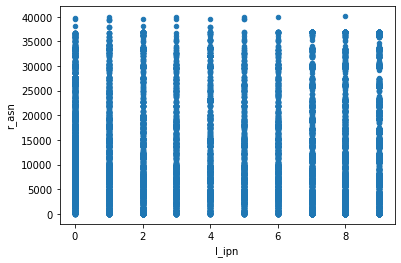

In [ ]:
asn_traffic.plot(kind= 'scatter', x= 'l_ipn', y= 'r_asn')
plt.show()

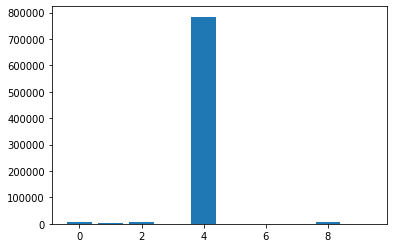

In [ ]:
x = asn_traffic['l_ipn']
y = asn_traffic['f']

plt.bar(x, y)
plt.show()

In [ ]:
del asn_traffic['date']
asn_traffic.head(10)

,l_ipn,r_asn,f
0,0,701,1
1,0,714,1
2,0,1239,1
3,0,1680,1
4,0,2514,1
5,0,3320,1
6,0,3561,13
7,0,4134,3
8,0,5617,2
9,0,6478,1


In [ ]:
asn_traffic

,l_ipn,r_asn,f
0,0,701,1
1,0,714,1
2,0,1239,1
3,0,1680,1
4,0,2514,1
...,...,...,...
20798,8,36351,3
20799,8,36856,4
20800,9,2152,1
20801,9,8070,1


In [ ]:
# separating the data and label
X = asn_traffic.drop(['f'],axis=1)
Y = asn_traffic['f']

In [ ]:
print(X)
print(Y)

       l_ipn  r_asn
0          0    701
1          0    714
2          0   1239
3          0   1680
4          0   2514
...      ...    ...
20798      8  36351
20799      8  36856
20800      9   2152
20801      9   8070
20802      9   8075

[20803 rows x 2 columns]
0        1
1        1
2        1
3        1
4        1
        ..
20798    3
20799    4
20800    1
20801    1
20802    2
Name: f, Length: 20803, dtype: int64


Train, Test, Split

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20, random_state=0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20803, 2) (16642, 2) (4161, 2)


Training the model:

K-Nearest Neighbors (KNN)

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
#training the support Vector Macine model
#start_time1 = time.perf_counter()
start_time1 = process_time()
model.fit(X_train,Y_train)
# test data
X_test_prediction = model.predict(X_test)
#end_time1 = time.perf_counter()
end_time1 = process_time()

Model Evaluation

Accuracy Score

Processing Time

In [ ]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
k_training_data_accuracy = accuracy_score(X_train_prediction,Y_train) 

In [ ]:
print('Accuracy on training data : ', k_training_data_accuracy)

Accuracy on training data :  0.4925489724792693


In [ ]:
# accuracy score on test data
#X_test_prediction = classifier.predict(X_test)
k_test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy on test data : ', k_test_data_accuracy)

Accuracy on test data :  0.29319875030040854


In [ ]:
# calculating time taken to traina and test data 
timetaken1 = end_time1 - start_time1
print("Time taken to train and test data  =", timetaken1, "seconds")

Time taken to train and test data  = 0.12646133899999512 seconds


Training the model:

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
start_time2 = process_time()
model.fit(X_train, Y_train)
# test data
X_test_prediction = model.predict(X_test)
end_time2 = process_time()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model Evaluation

Accuracy Score

Processing Time

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
l_training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', l_training_data_accuracy)

Accuracy on Training data :  0.34689340223530823


In [ ]:
# accuracy on test data
#X_test_prediction = model.predict(X_test)
l_test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', l_test_data_accuracy)

Accuracy on Test data :  0.3333333333333333


In [ ]:
# calculating time taken to traina and test data 
timetaken2 = end_time2 - start_time2
print("Time taken to train and test data =", timetaken2, "seconds")

Time taken to train and test data = 96.548684181 seconds


Training the model:

Random Forest Classifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
start_time3 = process_time()
model.fit(X_train, Y_train)
# test data
X_test_prediction = model.predict(X_test)
end_time3 = process_time()

Model Evaluation

Accuracy Score

Processing Time

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
r_training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', r_training_data_accuracy)

Accuracy on Training data :  0.5627328446100228


In [ ]:
# accuracy on test data
#X_test_prediction = model.predict(X_test)
r_test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', r_test_data_accuracy)

Accuracy on Test data :  0.3544820956500841


In [ ]:
# calculating time taken to traina and test data 
timetaken3 = end_time3 - start_time3
print("Time taken to train and test data =", timetaken3, "seconds")

Time taken to train and test data = 13.965734463000018 seconds


Training the model:

Naive Bayes

In [ ]:
model = GaussianNB()

In [ ]:
start_time4 = process_time()
model.fit(X_train, Y_train)
# test data
X_test_prediction = model.predict(X_test)
end_time4 = process_time()

Model Evaluation

Accuracy Score

Processing Time

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
n_training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', n_training_data_accuracy)

Accuracy on Training data :  0.3316308136041341


In [ ]:
# accuracy on test data
#X_test_prediction = model.predict(X_test)
n_test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', n_test_data_accuracy)

Accuracy on Test data :  0.3066570535928863


In [ ]:
# calculating time taken to traina and test data 
timetaken4 = end_time4 - start_time4
print("Time taken to train and test data =", timetaken4, "seconds")

Time taken to train and test data = 0.1833438870000066 seconds


Graphical Representation

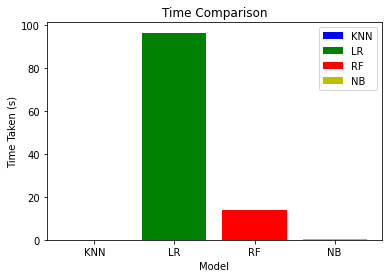

In [ ]:
x1 = ["KNN"]
y1 = [timetaken1]

x2 = ["LR"]
y2 = [timetaken2]

x3 = ["RF"]
y3 = [timetaken3]

x4 = ["NB"]
y4 = [timetaken4]

plt.bar(x1, y1, label="KNN", color='b')
plt.bar(x2, y2, label="LR", color='g')
plt.bar(x3, y3, label="RF", color='r')
plt.bar(x4, y4, label="NB", color='y')
plt.plot()

plt.xlabel("Model")
plt.ylabel("Time Taken (s)")
plt.title("Time Comparison")
plt.legend()
plt.show()

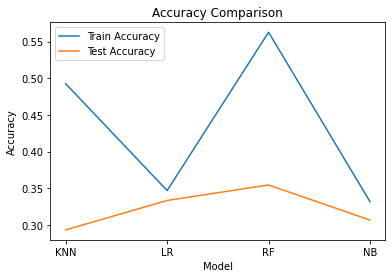

In [ ]:
x  = ['KNN', 'LR', 'RF', 'NB']
y1 = [k_training_data_accuracy, l_training_data_accuracy, r_training_data_accuracy, n_training_data_accuracy]
y2 = [k_test_data_accuracy, l_test_data_accuracy, r_test_data_accuracy, n_test_data_accuracy]
plt.plot(x, y1, label="Train Accuracy")
plt.plot(x, y2, label="Test Accuracy")
plt.plot()

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.legend()
plt.show()

In [ ]:
table = [['', 'Training Accuracy', 'Test Accuracy', 'Processing Time to Train and Test Data'], 
         ['KNN', k_training_data_accuracy, k_test_data_accuracy, timetaken1], 
         ['LR', l_training_data_accuracy, l_test_data_accuracy, timetaken2], 
         ['RF', r_training_data_accuracy, r_test_data_accuracy, timetaken3], 
         ['NB', n_training_data_accuracy, n_test_data_accuracy, timetaken4]]

In [ ]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════╤═════════════════════╤═════════════════╤══════════════════════════════════════════╕
│     │   Training Accuracy │   Test Accuracy │   Processing Time to Train and Test Data │
╞═════╪═════════════════════╪═════════════════╪══════════════════════════════════════════╡
│ KNN │            0.492549 │        0.293199 │                                 0.126461 │
├─────┼─────────────────────┼─────────────────┼──────────────────────────────────────────┤
│ LR  │            0.346893 │        0.333333 │                                96.5487   │
├─────┼─────────────────────┼─────────────────┼──────────────────────────────────────────┤
│ RF  │            0.562733 │        0.354482 │                                13.9657   │
├─────┼─────────────────────┼─────────────────┼──────────────────────────────────────────┤
│ NB  │            0.331631 │        0.306657 │                                 0.183344 │
╘═════╧═════════════════════╧═════════════════╧══════════════════════════════════════════╛